In [50]:
import pandas as pd
import datetime as dt
data=pd.read_csv('D:\\Stock_Anlysis\\btc_data.csv', parse_dates=['Date'])


In [51]:
data['Adj Close'].isnull().sum()

0

In [52]:
data['Date'] = pd.to_datetime(data['Date'])

In [54]:
data= data[:3029]

data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [55]:
data.set_index('Date', inplace=True)


In [56]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Adj Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -1.6363615118831523
p-value: 0.46416263424329013


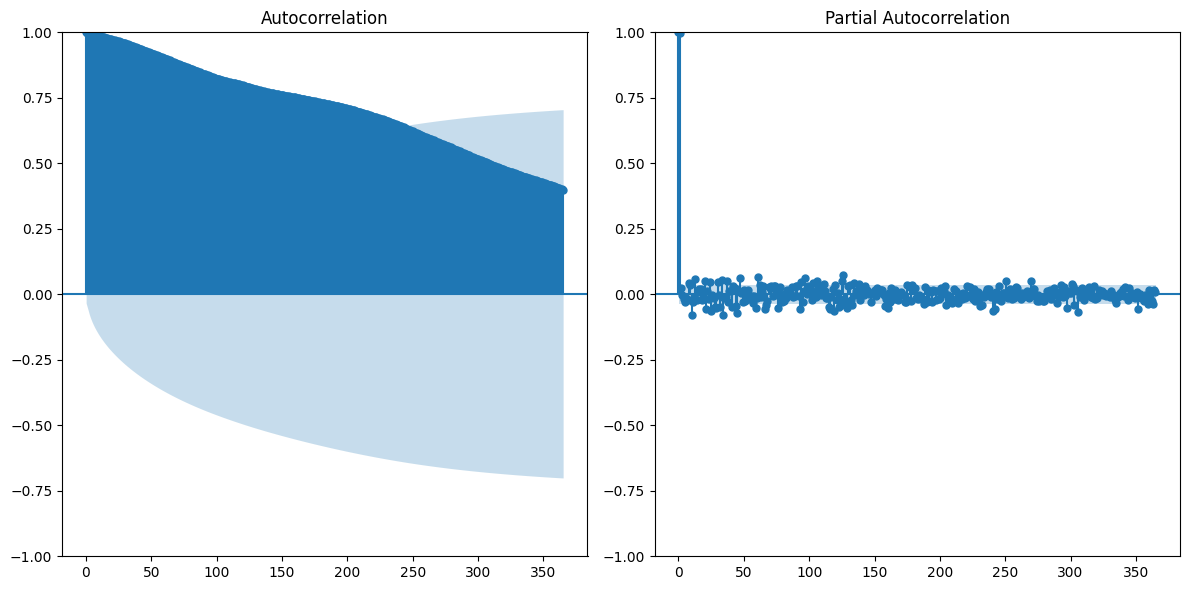

In [58]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# data.set_index('Date', inplace=True)

time_series= data['Adj Close']


plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(time_series, lags=365, ax=plt.gca())  


plt.subplot(122)
plot_pacf(time_series, lags=365, ax=plt.gca())  

plt.tight_layout()
plt.show()




In [61]:
print(data['Adj Close'].isna().sum())

0


In [ ]:
import numpy as np



data['Adj_diff_close']= data['Adj Close'].diff(7)



adj_results= adfuller(data['Adj_diff_close'].dropna())

print('ADF stats after difference',adj_results[0])
print('p-value after difference', adj_results[1])



ADF stats after difference -7.305004219490256
p-value after difference 1.3084927291094184e-10


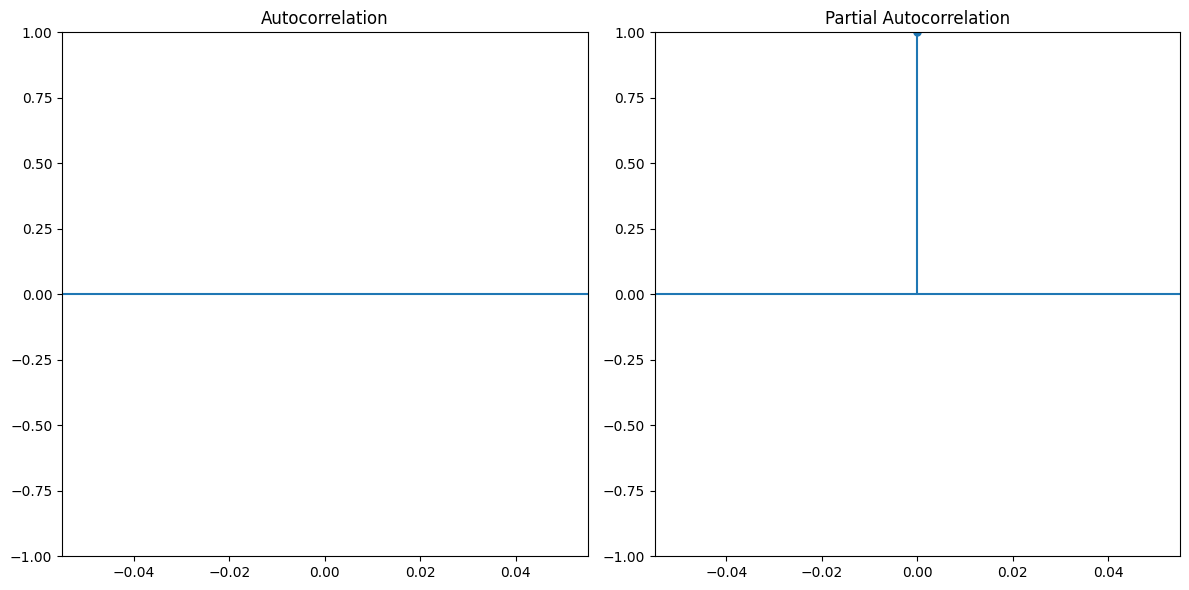

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


time_series_after_adj= data['Adj_diff_close']


plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(time_series_after_adj, lags=7, ax=plt.gca())  


plt.subplot(122)
plot_pacf(time_series_after_adj, lags=365, ax=plt.gca())  

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model based on the insights from ACF/PACF
model = SARIMAX(data['Adj_diff_close'], 
                order=(1, 1, 0),  # p, d, q based on ACF and PACF
                seasonal_order=(1, 1, 0, 7),  # P, D, Q, S based on seasonal differencing
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
sarima_result = model.fit(disp=False)

# Summary of the SARIMA model
print(sarima_result.summary())


C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                    Adj_diff_close   No. Observations:                 3000
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 7)   Log Likelihood              -26017.844
Date:                           Thu, 05 Dec 2024   AIC                          52041.688
Time:                                   13:05:55   BIC                          52059.691
Sample:                               09-17-2014   HQIC                         52048.166
                                    - 12-03-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0099      0.008     -1.184      0.236      -0.026       0.006
ar.S.L7       -0.6799      0.005   -124.866

TypeError: missing a required argument: 'y_pred'

In [4]:
data['PureDate']=pd.to_datetime(data['Date']).dt.date



In [5]:
data['open_close_diff']=data['Open']-data['Close']
data['high_low_diff']=data['High']-data['Low']
data['open_adj_close_diff']=data['Open']-data['Adj Close']

In [6]:
data.set_index("PureDate", inplace=True)

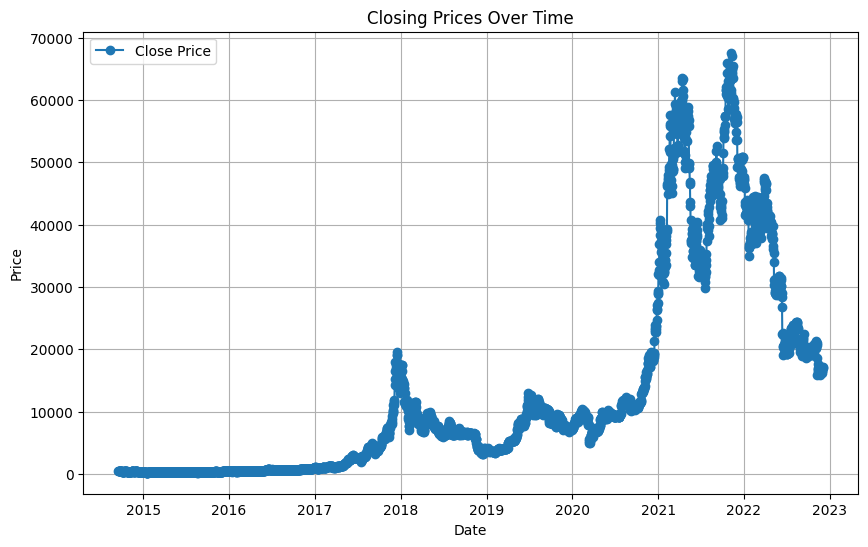

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price', marker='o')
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


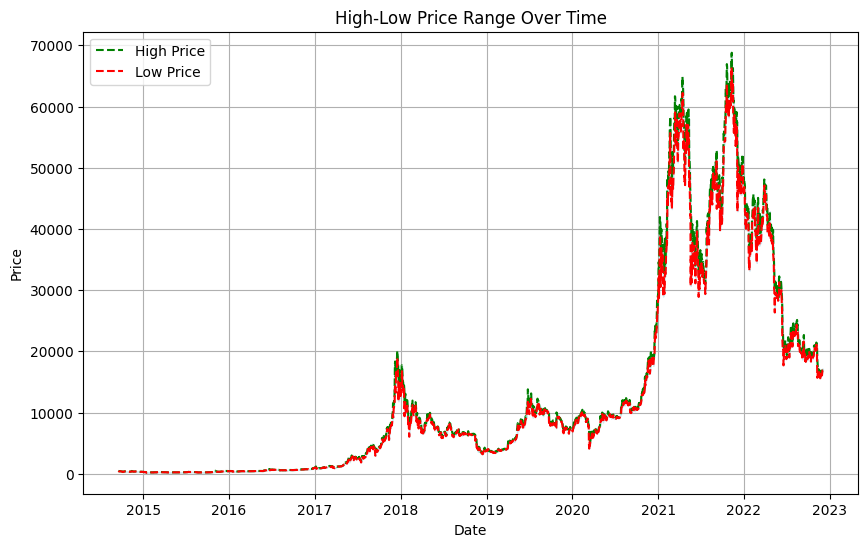

In [8]:
plt.figure(figsize=(10, 6))
plt.fill_between(data.index, data['High'], data['Low'], color='lightblue', alpha=0.5)
plt.plot(data.index, data['High'], label='High Price', linestyle='--', color='green')
plt.plot(data.index, data['Low'], label='Low Price', linestyle='--', color='red')
plt.title("High-Low Price Range Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


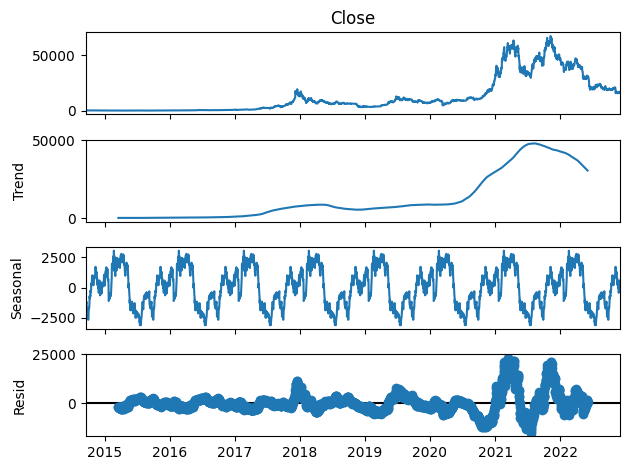

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose



# Decompose the time series
result = seasonal_decompose(data['Close'], model='additive', period=365)  # Adjust period based on data frequency

# Plot the decomposed components
result.plot()
plt.show()


In [79]:
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')  # Set frequency explicitly (daily, in this case)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

# Assuming your data is loaded as a pandas DataFrame `data` with a 'PureDate' column as the datetime index




# Split the data into train and test sets
train = data['Close'][:int(0.8 * len(data))]  # First 80% for training
test = data['Close'][int(0.8 * len(data)):]   # Remaining 20% for testing

# Fit SARIMA model (adjust parameters based on seasonal decomposition)
sarima_model = SARIMAX(train,
                       order=(1, 2, 1),          # ARIMA(p, d, q) part (you can adjust this based on your ACF/PACF analysis)
                       seasonal_order=(1, 1, 1,365), # SARIMA(P, D, Q, S) part (based on seasonality)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit()


# Forecast the next steps
forecast_steps = len(test)
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_index = test.index

# Get prediction values and confidence intervals 
forecast_mean = forecast.predicted_mean
confidence_int = forecast.conf_int()

# Plot the forecast and actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_index, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], color='gray', alpha=0.2)
plt.title('SARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate performance (optional)
forecast_error = rmse(test, forecast_mean)
print(f'Root Mean Squared Error (RMSE): {forecast_error}')




In [52]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
print('ADF Statistic:', result[0])
print('p-value:', result[1])  # p-value < 0.05 suggests stationarity


ADF Statistic: -1.6278883852512511
p-value: 0.4685962088935518


In [55]:
diff_data = data['Close'].diff().diff().dropna()


In [56]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(diff_data)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')


ADF Statistic: -21.04569760743798
p-value: 0.0


In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train,
                       order=(1, 2, 1),           # Updated ARIMA(p, d, q)
                       seasonal_order=(1, 1, 1, 30), # Adjust seasonal (P, D, Q, S)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit()

# Evaluate model diagnostics
sarima_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 2980
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 30)   Log Likelihood              -23709.424
Date:                            Thu, 05 Dec 2024   AIC                          47428.847
Time:                                    10:49:33   BIC                          47458.737
Sample:                                09-17-2014   HQIC                         47439.614
                                     - 11-13-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0274      0.010     -2.834      0.005      -0.046      -0.008
ma.L1         -1.0035      0.001   -931.432      0.000      -1.006      -1.001
ar.S.L30       0.0076      0.012      0.640      0.522      -0.016       0.031
ma.S.L30      -0.9923      0.011    -91.665      0.000      -1.014      -0.971
sigma2       6.51e+05   7853.971     82.885      0.000    6.36e+05    6.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             32735.54
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):            1547.95   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

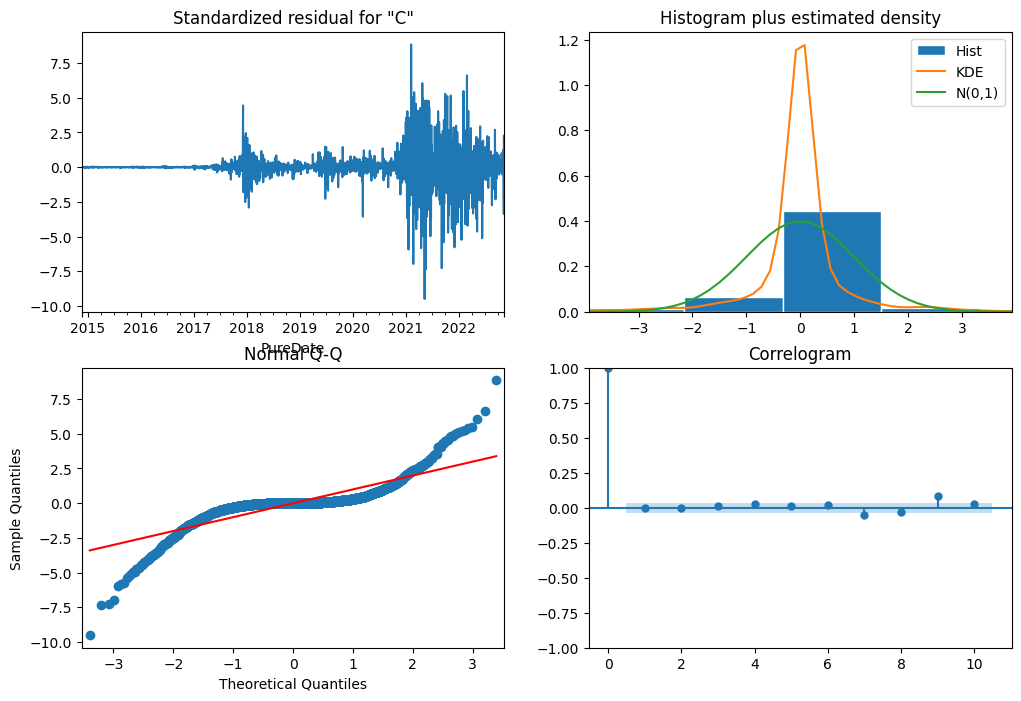

In [58]:
# Plot residual diagnostics
sarima_results.plot_diagnostics(figsize=(12, 8))
plt.show()


In [32]:
print(f"Mean of Test Data: {test.mean()}")
print(f"Range of Test Data: {test.max() - test.min()}")
print(f"Percentage Error: {(683.13 / test.mean()) * 100:.2f}%")


Mean of Test Data: 1252.8823528895
Range of Test Data: 2226.0751339
Percentage Error: 54.52%
